# Plot Contents:
Bar Plot ,
Point Plot ,
Joint Plot ,
Pie Chart ,
Lm Plot ,
Kde Plot ,
Violin Plot ,
Heatmap ,
Box Plot ,
Swarm Plot ,
Pair Plot ,
Count Plot


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Data
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
 
# Proposed themes: darkgrid, whitegrid, dark, white, and ticks
 
sns.set_style("whitegrid")
sns.boxplot(data=data)
plt.title("whitegrid")
 
sns.set_style("darkgrid")
sns.boxplot(data=data);
plt.title("darkgrid")
 
sns.set_style("white")
sns.boxplot(data=data);
plt.title("white")
 
sns.set_style("dark")
sns.boxplot(data=data);
plt.title("dark")
 
sns.set_style("ticks")
sns.boxplot(data=data);
plt.title("ticks")

In [55]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0 ,encoding = 'unicode_escape')

In [57]:
df.head(3)
# df.shape

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False


In [30]:
x = df["Attack"]
y = df["Defense"]

# lmplot

# 3: Seaborn's plotting functions.
One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the lmplot() function.

There are two ways you can do so.

The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.
The second way is to directly pass in Series of data to the axes arguments.

/Users/rakeshkumar/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


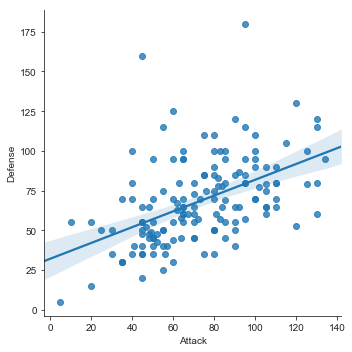

In [50]:
# Default ScatterPlot (Careful for passing parameters)
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)


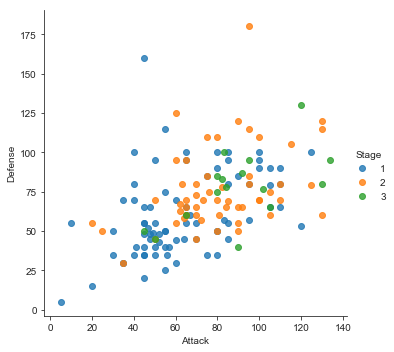

In [45]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage
# we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.
# we'll set hue='Stage' to color our points by the Pokémon's evolution stage. This hue argument is very useful 
# because it allows you to express a third dimension of information using color.

# 4: Customizing with Matplotlib.
Remember, Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

Setting your axes limits is one of those times, but the process is pretty simple:

First, invoke your Seaborn plotting function as normal.
Then, invoke Matplotlib's customization functions. In this case, we'll use its ylim() and xlim() functions.

(0, 141.97310248937742)

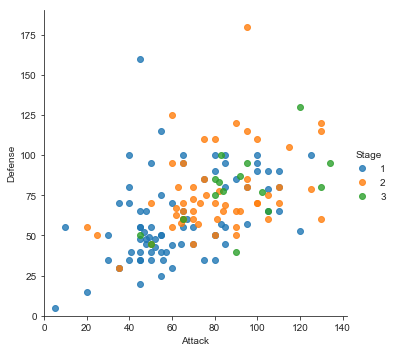

In [46]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

# 5: The role of Pandas.
Even though this is a Seaborn tutorial, Pandas actually plays a very important role. You see, Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted.



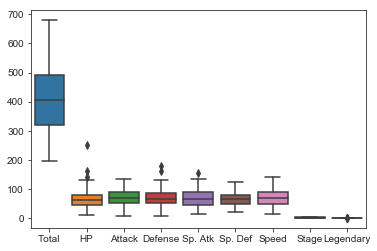

In [47]:
# Default Boxplot
sns.boxplot(data=df)

Well, that's a reasonable start, but there are some columns we'd probably like to remove:

We can remove the Total since we have individual stats.
We can remove the Stage and Legendary columns because they aren't combat stats.
In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your DataFrame.

Let's create a new DataFrame called stats_df that only keeps the stats columns:



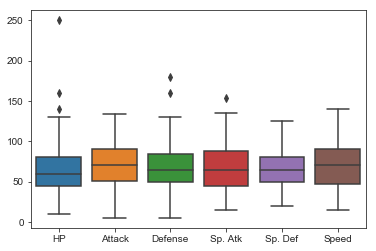

In [58]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

In [63]:
stats_df.shape

(151, 9)

In [64]:
df.shape

(151, 12)

# 6: Seaborn themes.
Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'.

Next, we'll change the theme to 'whitegrid' while making a violin plot.

Violin plots are useful alternatives to box plots.
They show the distribution (through the thickness of the violin) instead of only the summary statistics.
For example, we can visualize the distribution of Attack by Pokémon's primary type:

In [ ]:
# Set theme , plot violin plot
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

Now, Pokémon fans might find something quite jarring about that plot: The colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We must fix this!



# 7: Color palettes.
Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

Let's use Bulbapedia to help us create a new color palette:

In [ ]:
#Pokeman Color palatte
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

In [ ]:
# Violin plot with Pokemon color palette
#Custom color palatte
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the swarm plot comes in. This visualization will show each point, while "stacking" those with similar values:

Swarm plotPython

In [ ]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

That's handy, but can't we combine our swarm plot and the violin plot? After all, they display similar information, right?

# 8: Overlaying plots.
The answer is yes.

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

First, we'll make our figure larger using Matplotlib.
Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.
Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
Finally, we'll set a title using Matplotlib.

In [ ]:
#overlaying swarm and violin plot
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

Awesome, now we have a pretty chart that tells us how Attack values are distributed across different Pokémon types. But what it we want to see all of the other stats as well?



# 9: Putting it all together.
Well, we could certainly repeat that chart for each stat. But we can also combine the information into one chart... we just have to do some data wrangling with Pandas beforehand.

First, here's a reminder of our data format:

To do so, we'll use Pandas's melt() function. It takes 3 arguments:

First, the DataFrame to melt.
Second, ID variables to keep (Pandas will melt all of the other ones).
Finally, a name for the new, melted variable.

In [ ]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In fact, if you print the shape of these two DataFrames...



In [ ]:
print( stats_df.shape )
print( melted_df.shape )
# (151, 9)
# (906, 5)

you'll find that melted_df has 6 times the number of rows as stats_df.

Now we can make a swarm plot with melted_df.

But this time, we're going to set x='Stat' and y='value' so our swarms are separated by stat.
Then, we'll set hue='Type 1' to color our points by the Pokémon type.

In [ ]:
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

In [ ]:
Finally, let's make a few final tweaks for a more readable chart:

Enlarge the plot.
Separate points by hue using the argument split=True .
Use our custom Pokemon color palette.
Adjust the y-axis limits to end at 0.
Place the legend to the right.

In [ ]:
# 1. Enlarge the plot , Customize
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# 10: Pokédex (mini-gallery).
We're going to conclude this tutorial with a few quick-fire data visualizations, just to give you a sense of what's possible with Seaborn.



# 10.1 - Heatmap
Heatmaps help you visualize matrix-like data.

In [ ]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)


# 10.2 - Histogram
Histograms allow you to plot the distributions of numeric variables.

In [ ]:
# Distribution Plot (Histogram)
sns.distplot(df.Attack)

# 10.3 - Bar Plot
Bar plots help you visualize the distributions of categorical variables

In [ ]:

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

# 10.4 - Factor Plot
Factor plots make it easy to separate plots by categorical classes.

In [ ]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

# 10.5 - Density Plot
Density plots display the distribution between two variables.

Tip: Consider overlaying this with a scatter plot.

In [ ]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

# 10.6 - Joint Distribution Plot
Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

In [ ]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)